In [345]:
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

In [346]:
delay_df = pd.read_csv('Toronto-Subway-Delay-Jan-2014-Jun-2021.csv')
code_df = pd.read_csv('Toronto-Subway-Delay-Codes.csv')

In [347]:
weather_data_2019 = pd.concat([pd.read_csv('Weather_Data/2019/'+filen) for filen in os.listdir('Weather_Data/2019')])
weather_data_2019.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Time,Temp (°C),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-01-01 00:00,2019,1,1,00:00,4.3,...,NaN,4.8,NaN,98.49,NaN,NaN,NaN,NaN,NaN,"Rain,Fog"
1,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-01-01 01:00,2019,1,1,01:00,5.1,...,NaN,16.1,NaN,98.47,NaN,NaN,NaN,NaN,NaN,NaN
2,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-01-01 02:00,2019,1,1,02:00,5.9,...,NaN,4.0,NaN,98.57,NaN,NaN,NaN,NaN,NaN,"Rain,Fog"
3,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-01-01 03:00,2019,1,1,03:00,3.3,...,NaN,16.1,NaN,98.98,NaN,NaN,NaN,NaN,NaN,NaN
4,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-01-01 04:00,2019,1,1,04:00,2.8,...,NaN,16.1,NaN,99.29,NaN,NaN,NaN,NaN,NaN,NaN


In [348]:
weather_data_2019.index = pd.DatetimeIndex(weather_data_2019['Date/Time'])
weather_data_2019 = weather_data_2019.drop(['Date/Time'], axis=1)
weather_data_2019.index = weather_data_2019.index.tz_localize(tz='EST')

weather_data_2019.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Time,Temp (°C),Temp Flag,...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
Date/Time,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019,1,1,00:00,4.3,NaN,...,NaN,4.8,NaN,98.49,NaN,NaN,NaN,NaN,NaN,"Rain,Fog"
2019-01-01 01:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019,1,1,01:00,5.1,NaN,...,NaN,16.1,NaN,98.47,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 02:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019,1,1,02:00,5.9,NaN,...,NaN,4.0,NaN,98.57,NaN,NaN,NaN,NaN,NaN,"Rain,Fog"
2019-01-01 03:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019,1,1,03:00,3.3,NaN,...,NaN,16.1,NaN,98.98,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 04:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019,1,1,04:00,2.8,NaN,...,NaN,16.1,NaN,99.29,NaN,NaN,NaN,NaN,NaN,NaN


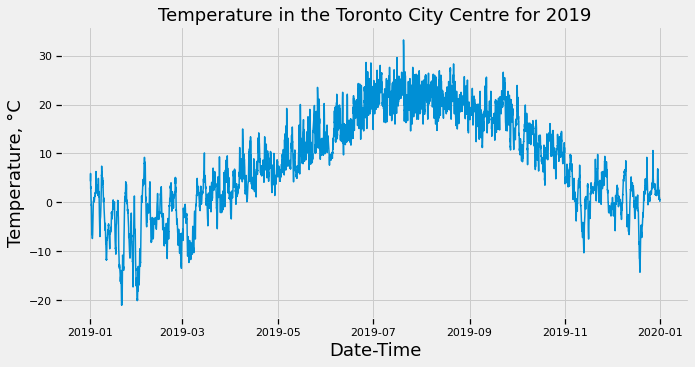

In [349]:
# Write your code here.
plt.figure(figsize=(10, 5))
plt.title('Temperature in the Toronto City Centre for 2019', fontsize=18)
ax = sns.lineplot(data=weather_data_2019, x=weather_data_2019.index, y='Temp (°C)')
ax.set_xlabel('Date-Time', fontsize=18)
ax.set_ylabel('Temperature, °C', fontsize=18)
plt.show()

In [350]:
delay_df.head()

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,2014/01/01,00:21,Wednesday,VICTORIA PARK STATION,MUPR1,55,60,W,BD,5111
1,2014/01/01,02:06,Wednesday,HIGH PARK STATION,SUDP,3,7,W,BD,5001
2,2014/01/01,02:40,Wednesday,SHEPPARD STATION,MUNCA,0,0,NaN,YU,0
3,2014/01/01,03:10,Wednesday,LANSDOWNE STATION,SUDP,3,8,W,BD,5116
4,2014/01/01,03:20,Wednesday,BLOOR STATION,MUSAN,5,10,S,YU,5386


In [351]:
delay_df.dtypes

Date         object
Time         object
Day          object
Station      object
Code         object
Min Delay     int64
Min Gap       int64
Bound        object
Line         object
Vehicle       int64
dtype: object

In [352]:
#delay_df['dtime'] = pd.to_datetime(delay_df['Date'] + ' ' + delay_df['Time'])

In [353]:
missing_df = delay_df.isnull().sum().to_frame('count')
missing_df

,count
Date,0
Time,0
Day,0
Station,0
Code,1
Min Delay,0
Min Gap,0
Bound,32214
Line,544
Vehicle,0


In [354]:
line = delay_df['Line'].value_counts(normalize=True)
line

YU                        0.463741
BD                        0.451501
SRT                       0.037022
SHP                       0.034114
YU/BD                     0.011920
                            ...   
341 KEELE                 0.000007
63 OSSINGTON              0.000007
129 MCCOWAN NORTH         0.000007
YU BD                     0.000007
YONGE/UNIVERSITY/BLOOR    0.000007
Name: Line, Length: 71, dtype: float64

In [355]:
print("Percentage of Accurate Data:\n" ,line.iloc[0:4].sum()*100)

Percentage of Accurate Data:
 98.63781883618253


In [356]:
line.index[0:4].values.tolist()

['YU', 'BD', 'SRT', 'SHP']

In [357]:
bound = delay_df['Bound'].value_counts()
bound

S    30518
W    28736
E    26793
N    25561
B       90
Y        2
R        1
5        1
0        1
Name: Bound, dtype: int64

In [358]:
bound.index[0:4].values.tolist()

['S', 'W', 'E', 'N']

In [359]:
newdf = delay_df.loc[delay_df['Line'].isin(line.index[0:4].values.tolist()) & delay_df['Bound'].isin(bound.index[0:4].values.tolist())]
newdf

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,2014/01/01,00:21,Wednesday,VICTORIA PARK STATION,MUPR1,55,60,W,BD,5111
1,2014/01/01,02:06,Wednesday,HIGH PARK STATION,SUDP,3,7,W,BD,5001
3,2014/01/01,03:10,Wednesday,LANSDOWNE STATION,SUDP,3,8,W,BD,5116
4,2014/01/01,03:20,Wednesday,BLOOR STATION,MUSAN,5,10,S,YU,5386
5,2014/01/01,03:29,Wednesday,DUFFERIN STATION,MUPAA,0,0,E,BD,5174
...,...,...,...,...,...,...,...,...,...,...
143908,2021/06/30,00:11,Wednesday,BAY STATION,PUTDN,0,0,W,BD,5112
143909,2021/06/30,00:42,Wednesday,VAUGHAN MC STATION,MUPAA,0,0,S,YU,5511
143910,2021/06/30,00:45,Wednesday,OSSINGTON STATION,MUIRS,0,0,E,BD,0
143915,2021/06/30,20:50,Wednesday,LESLIE STATION,MUTD,9,14,E,SHP,6171


In [360]:
newdf['Bound'].value_counts()

S    30492
W    28684
E    26746
N    25542
Name: Bound, dtype: int64

In [361]:
newdf.isnull().sum()

Date         0
Time         0
Day          0
Station      0
Code         1
Min Delay    0
Min Gap      0
Bound        0
Line         0
Vehicle      0
dtype: int64

In [362]:
newdf.shape

(111464, 10)

In [363]:
delay_df.shape

(143917, 10)

In [364]:
newdf.dropna(how='any',inplace=True)

In [365]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111463 entries, 0 to 143916
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Date       111463 non-null  object
 1   Time       111463 non-null  object
 2   Day        111463 non-null  object
 3   Station    111463 non-null  object
 4   Code       111463 non-null  object
 5   Min Delay  111463 non-null  int64 
 6   Min Gap    111463 non-null  int64 
 7   Bound      111463 non-null  object
 8   Line       111463 non-null  object
 9   Vehicle    111463 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 9.4+ MB


In [366]:
newdf['Min Delay']

0         55
1          3
3          3
4          5
5          0
          ..
143908     0
143909     0
143910     0
143915     9
143916     5
Name: Min Delay, Length: 111463, dtype: int64

In [367]:
df_100delay=newdf.sort_values('Min Delay', ascending=False).head(100)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


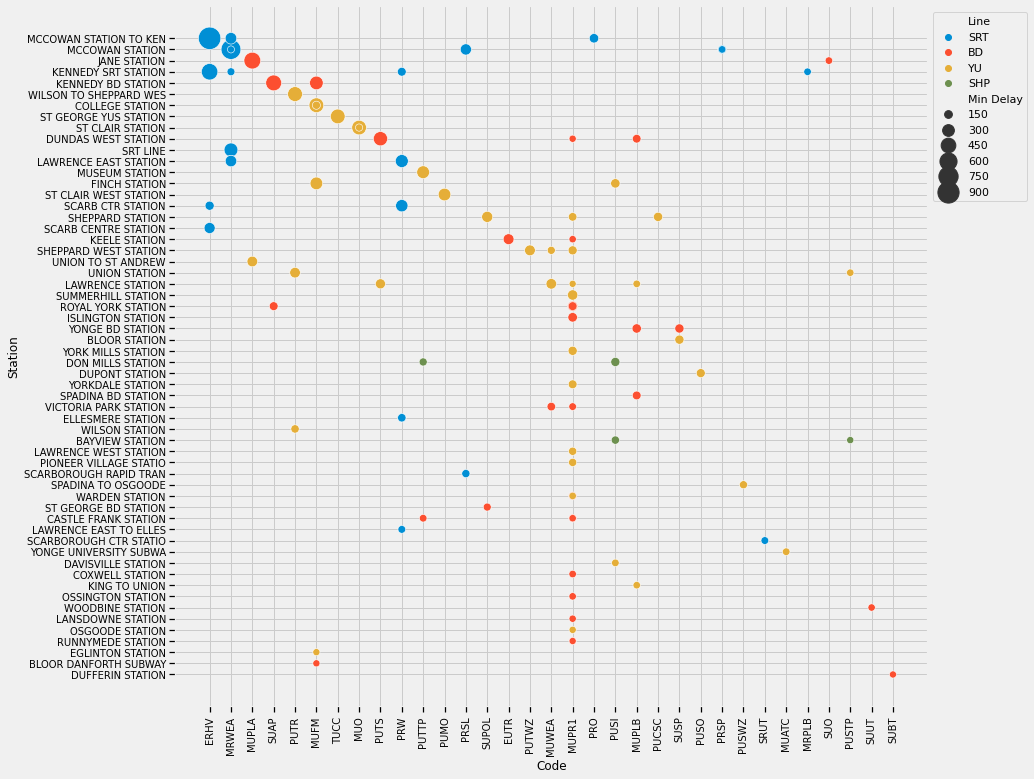

In [368]:
plt.figure(figsize=(12, 12))
plt.legend(fontsize=10)
plt.tick_params(labelsize=10)
ax=sns.scatterplot(x=df_100delay['Code'],y=df_100delay['Station'],hue=df_100delay['Line'],size=df_100delay['Min Delay'],data=df_100delay,sizes=(50,500))
plt.setp(ax.get_xticklabels(), rotation=90)
ax.legend(loc='upper left',bbox_to_anchor=(1,1))
plt.show()

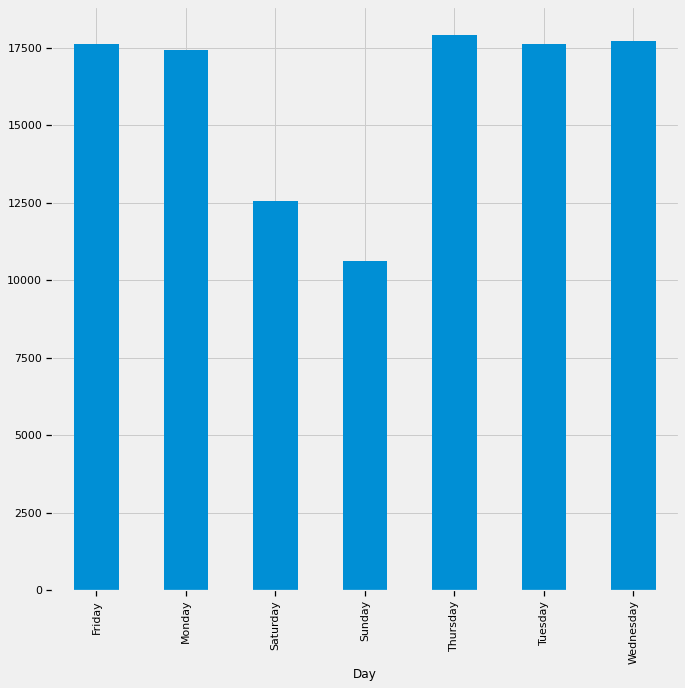

In [369]:
newdf.groupby('Day')['Code'].count().plot.bar(figsize=(10,10))
plt.show()

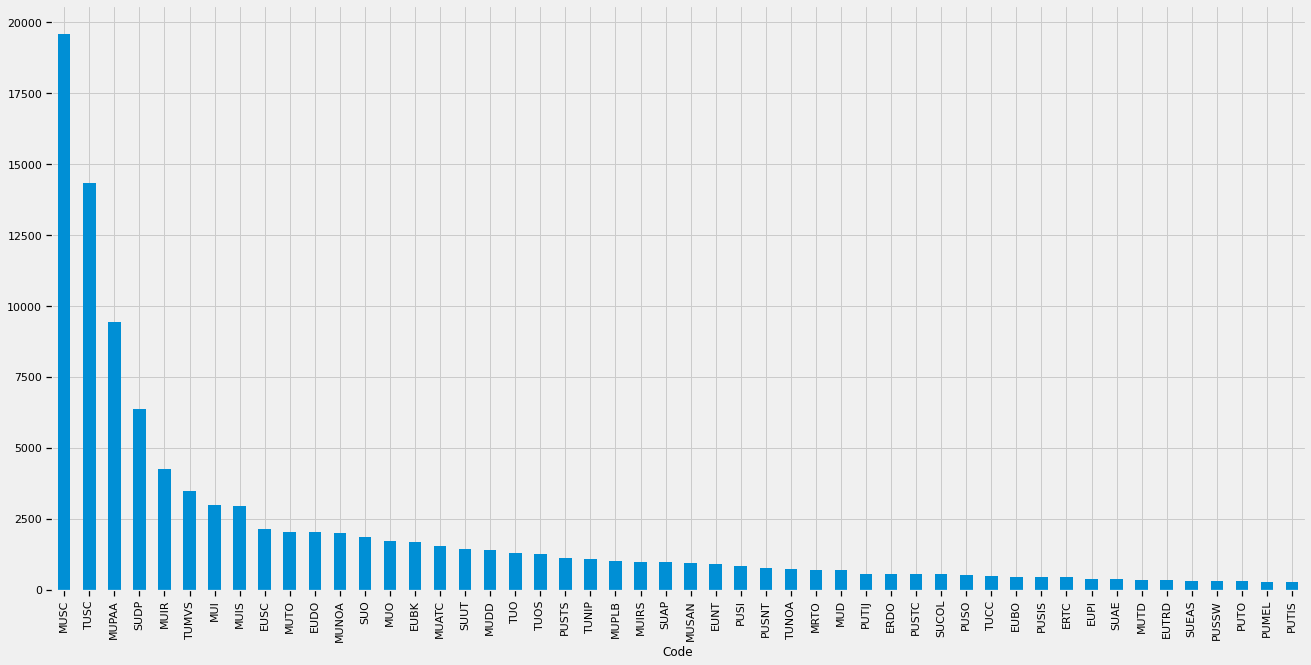

In [370]:
newdf.groupby('Code')['Code'].count().sort_values(ascending=False).head(50).plot.bar(figsize=(20,10))
plt.show()

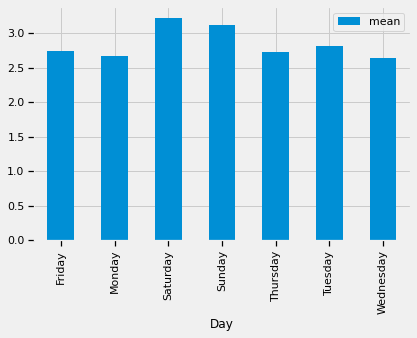

In [371]:
#plt.figure(figsize=(20, 6))
newdf.groupby(newdf['Day'])['Min Delay'].agg(['mean']).plot.bar()
plt.show()

In [372]:
code_df.loc[code_df['RMENU CODE'] == 'MUSC']['CODE DESCRIPTION']

53    Miscellaneous Speed Control
Name: CODE DESCRIPTION, dtype: object

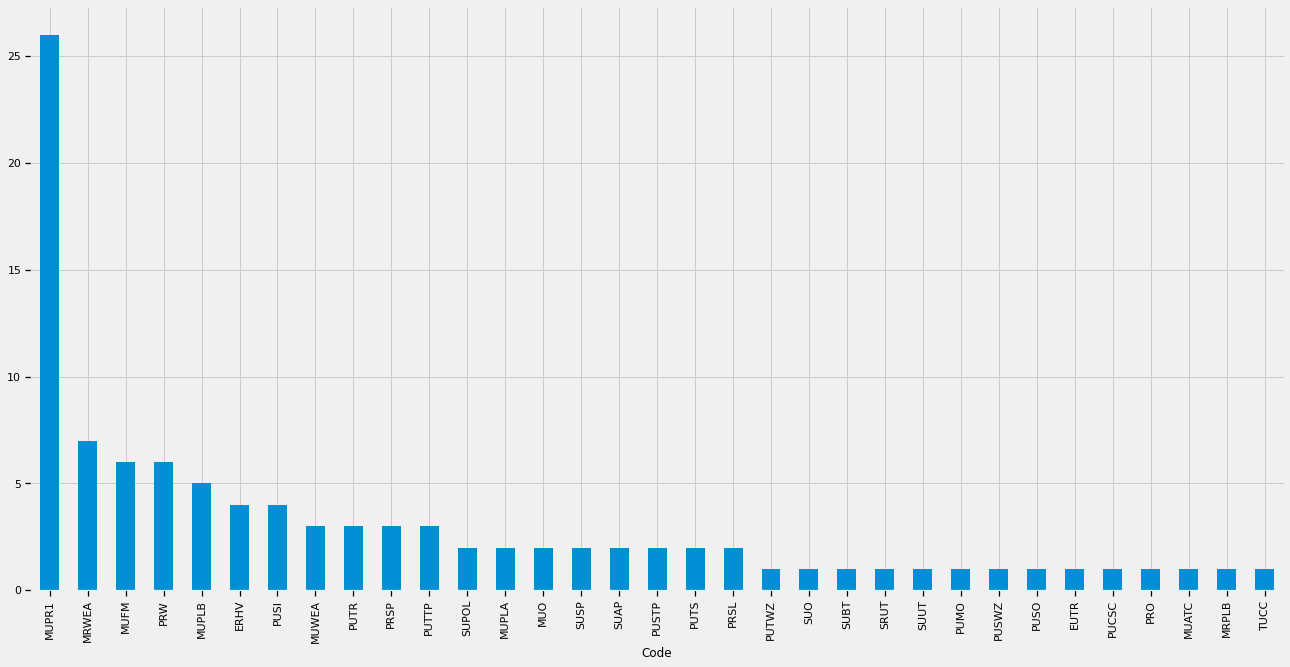

In [373]:
df_100delay.groupby('Code')['Code'].count().sort_values(ascending=False).head(50).plot.bar(figsize=(20,10))
plt.show()

In [374]:
df_100delay.groupby('Code')['Code'].count().sort_values(ascending=False).index[0]

'MUPR1'

In [375]:
code_df.loc[code_df['RMENU CODE'] == 'MUPR1']['CODE DESCRIPTION']

51    Priority One - Train in Contact With Person
Name: CODE DESCRIPTION, dtype: object

In [376]:
code_df.rename(columns = {'RMENU CODE': "Code"}, inplace = True)

In [377]:
big_df = pd.merge(newdf, code_df, how = "left", on = "Code")

In [378]:
big_df.head()

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,Code #,Vehicle Type,CODE DESCRIPTION
0,2014/01/01,00:21,Wednesday,VICTORIA PARK STATION,MUPR1,55,60,W,BD,5111,52.0,SUB,Priority One - Train in Contact With Person
1,2014/01/01,02:06,Wednesday,HIGH PARK STATION,SUDP,3,7,W,BD,5001,105.0,SUB,Disorderly Patron
2,2014/01/01,03:10,Wednesday,LANSDOWNE STATION,SUDP,3,8,W,BD,5116,105.0,SUB,Disorderly Patron
3,2014/01/01,03:20,Wednesday,BLOOR STATION,MUSAN,5,10,S,YU,5386,53.0,SUB,Unsanitary Vehicle
4,2014/01/01,03:29,Wednesday,DUFFERIN STATION,MUPAA,0,0,E,BD,5174,48.0,SUB,Passenger Assistance Alarm Activated - No Trou...


In [379]:
big_df.dropna(how = "any", inplace = True)
big_df.isnull().sum()

Date                0
Time                0
Day                 0
Station             0
Code                0
Min Delay           0
Min Gap             0
Bound               0
Line                0
Vehicle             0
Code #              0
Vehicle Type        0
CODE DESCRIPTION    0
dtype: int64

In [380]:
# set the date column as a datetime object
import datetime
#big_df['Date'] = pd.to_datetime(big_df['Date'])
# create merged Date Time Column 
big_df['Datetime'] = pd.to_datetime(big_df['Date'] + ' ' + big_df['Time'])
# plot subway delays throughout time 
#big_df['Datetime'] = pd.to_datetime(big_df['Datetime'])
# import pytz package 
import pytz
# localize timezone to EST (Toronto Timezone)
# declare eastern time stamp variable to use in for loop 
est = pytz.timezone('Canada/Eastern')

# Apply the EST timezone to all date times in index column 
big_df['Datetime'] = big_df.apply(lambda row: est.localize(row['Datetime']), axis = 1)
# create hour column which will be used in plots later
big_df['Hour'] = big_df['Datetime'].dt.hour
# create month column which will be used in plots later 
big_df['Month'] = big_df['Datetime'].dt.month
# make day column a datetime object
big_df['Day'] = big_df['Datetime'].dt.dayofweek
big_df['Year'] = big_df['Datetime'].dt.year
big_df['Date'] = pd.to_datetime(big_df['Date'])

In [381]:
# calculate quartiles of data 
Q1 = big_df['Min Delay'].quantile(0.25)
Q3 = big_df['Min Delay'].quantile(0.75)

In [382]:
# calculate interquartile range of data 
IQR = Q3- Q1

In [383]:
# remove data that is greater Q3 + 1.5* IQR and less than Q1 - 1.5 * IQR 
big_df = big_df.drop(index = big_df[(big_df['Min Delay']< (Q1 - IQR*1.5)) | (big_df['Min Delay'] > (Q3 + 1.5 * IQR))].index)

# View DataFrame
big_df.head()

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,Code #,Vehicle Type,CODE DESCRIPTION,Datetime,Hour,Month,Year
1,2014-01-01,02:06,2,HIGH PARK STATION,SUDP,3,7,W,BD,5001,105.0,SUB,Disorderly Patron,2014-01-01 02:06:00-05:00,2,1,2014
2,2014-01-01,03:10,2,LANSDOWNE STATION,SUDP,3,8,W,BD,5116,105.0,SUB,Disorderly Patron,2014-01-01 03:10:00-05:00,3,1,2014
3,2014-01-01,03:20,2,BLOOR STATION,MUSAN,5,10,S,YU,5386,53.0,SUB,Unsanitary Vehicle,2014-01-01 03:20:00-05:00,3,1,2014
4,2014-01-01,03:29,2,DUFFERIN STATION,MUPAA,0,0,E,BD,5174,48.0,SUB,Passenger Assistance Alarm Activated - No Trou...,2014-01-01 03:29:00-05:00,3,1,2014
5,2014-01-01,08:48,2,KIPLING STATION,MUNOA,5,0,E,BD,0,45.0,SUB,No Operator Immediately Available - Not E.S.A....,2014-01-01 08:48:00-05:00,8,1,2014


<AxesSubplot:xlabel='Date'>

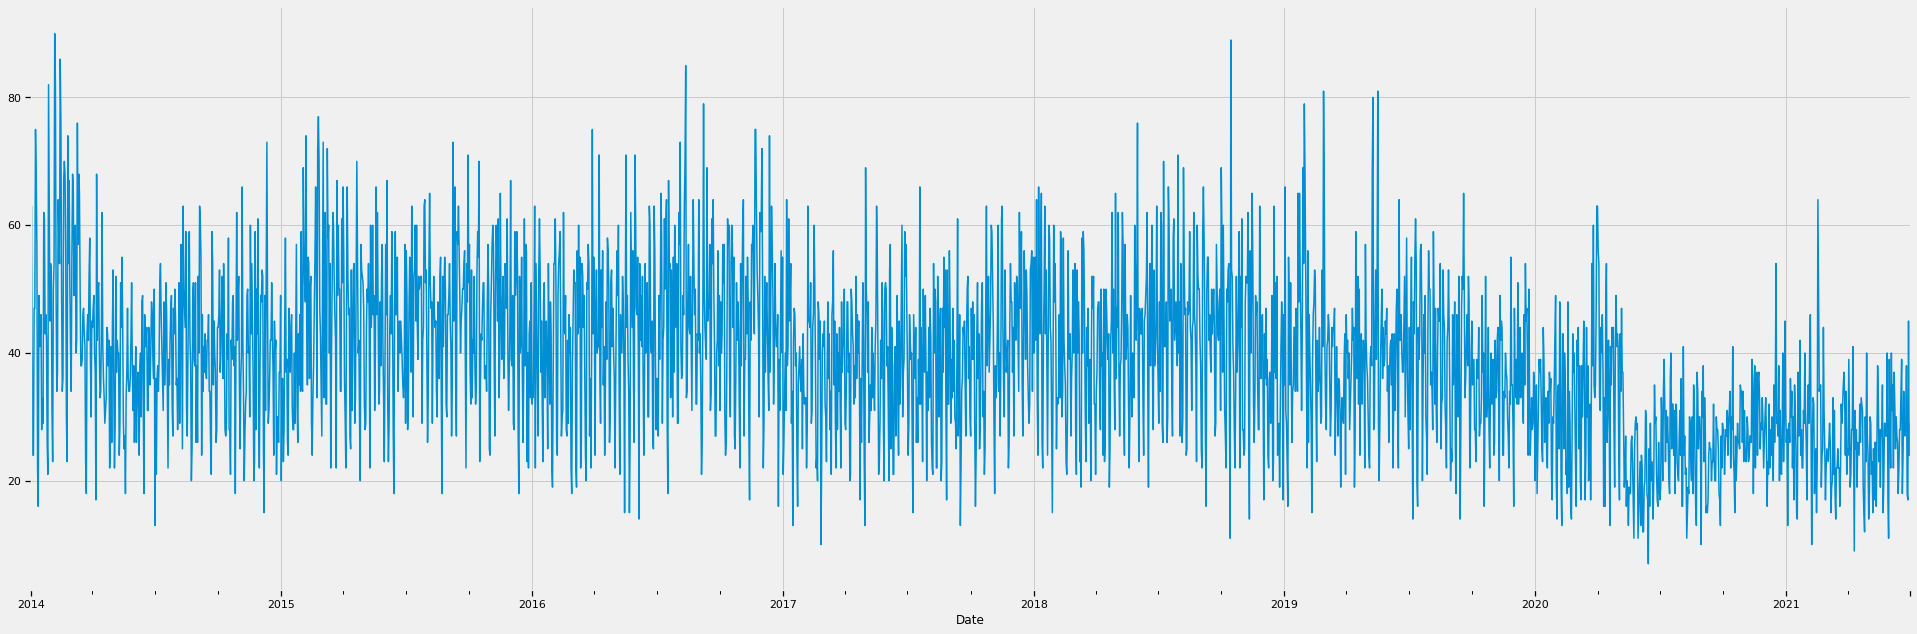

In [401]:
df_ts=big_df.groupby('Date')['Code'].count()
df_ts.plot(figsize=(30,10))

In [421]:
big_df.groupby('Day')['Code'].count()

Day
0    16680
1    16850
2    16962
3    17120
4    16812
5    11865
6    10054
Name: Code, dtype: int64

In [425]:
big_df.head()

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,Code #,Vehicle Type,CODE DESCRIPTION,Datetime,Hour,Month,Year
1,2014-01-01,02:06,2,HIGH PARK STATION,SUDP,3,7,W,BD,5001,105.0,SUB,Disorderly Patron,2014-01-01 02:06:00-05:00,2,1,2014
2,2014-01-01,03:10,2,LANSDOWNE STATION,SUDP,3,8,W,BD,5116,105.0,SUB,Disorderly Patron,2014-01-01 03:10:00-05:00,3,1,2014
3,2014-01-01,03:20,2,BLOOR STATION,MUSAN,5,10,S,YU,5386,53.0,SUB,Unsanitary Vehicle,2014-01-01 03:20:00-05:00,3,1,2014
4,2014-01-01,03:29,2,DUFFERIN STATION,MUPAA,0,0,E,BD,5174,48.0,SUB,Passenger Assistance Alarm Activated - No Trou...,2014-01-01 03:29:00-05:00,3,1,2014
5,2014-01-01,08:48,2,KIPLING STATION,MUNOA,5,0,E,BD,0,45.0,SUB,No Operator Immediately Available - Not E.S.A....,2014-01-01 08:48:00-05:00,8,1,2014


In [429]:
big_df['Bound'].unique()
big_df['Line'].unique()

array(['BD', 'YU', 'SHP', 'SRT'], dtype=object)

In [433]:
pd.get_dummies(big_df.Bound, prefix='Bound')

,Bound_E,Bound_N,Bound_S,Bound_W
5637,1,0,0,0
33723,1,0,0,0
92763,0,0,1,0
55776,0,0,0,1
79964,0,0,0,1
...,...,...,...,...
22130,1,0,0,0
47686,1,0,0,0
44284,1,0,0,0
45270,1,0,0,0


In [423]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(big_df, train_size=0.7, 
                               test_size=0.3, random_state=0)
val, test = train_test_split(test, train_size=0.5,
                             test_size=0.5, random_state=0)
print('Train:', train.shape, 'Val:', val.shape, 'Test:', test.shape)

Train: (74440, 17) Val: (15951, 17) Test: (15952, 17)


In [434]:
from sklearn.preprocessing import StandardScaler

# Define numerical features to use for modelling
num_features = ['Min Gap']

# Define categorical features to use for modelling
cat_features = ['Hour', 'Day', 'Month', 'Bound', 'Line']

# Fit scaler (basically get the mean and stdev) for the training data
scaler = StandardScaler()
scaler.fit(train[num_features])

def create_features(df):
    """Create a feature set from taxi ride dataframe df."""
    scaled = df[num_features].copy()
    
    # Convert numeric features to standard units
    scaled.iloc[:, :] = scaler.transform(scaled) 
    
    # Convert categorical features using dummy encoding
    categoricals = [pd.get_dummies(df[s], prefix=s, drop_first=True) for s in cat_features]
    
    return pd.concat([scaled] + categoricals, axis=1)

# Let's test our function
create_features(train).head()

,Min Gap,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,...,Month_9,Month_10,Month_11,Month_12,Bound_N,Bound_S,Bound_W,Line_SHP,Line_SRT,Line_YU
5637,-0.729651,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33723,-0.729651,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
92763,-0.729651,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
55776,0.937739,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
79964,-0.729651,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [436]:
def rmse(errors):
    """Return the root mean squared error."""
    return np.sqrt(np.mean(errors ** 2))

# Write your code here
constant_rmse = rmse(val['Min Delay'] - train['Min Delay'].mean())

# Print score
print('Constant model validation RMSE: {} minutes'.format(constant_rmse))

Constant model validation RMSE: 2.4989716867866782 seconds


In [439]:
from sklearn.linear_model import LinearRegression

# Write your code here
model = LinearRegression(fit_intercept=True)


model.fit(train[['Min Gap']], train['Min Delay'])
y_predict = model.predict(val[['Min Gap']])
simple_rmse = rmse(val['Min Delay'] - y_predict)

# Print score
print('Simple linear regression model validation RMSE: {} minutes'.format(simple_rmse))

Simple linear regression model validation RMSE: 0.7931846265130754 seconds


In [440]:
# Write your code here
X_train = create_features(train)
Y_train = train['Min Delay'] 
model.fit(X_train,Y_train)
Y_pred = model.predict(create_features(val))
Y_val =  val['Min Delay']

linear_rmse = rmse(Y_val - Y_pred)

# Print score
print('Multiple linear regression model validation RMSE: {} minutes'.format(linear_rmse))

Multiple linear regression model validation RMSE: 0.7666012963552373 seconds


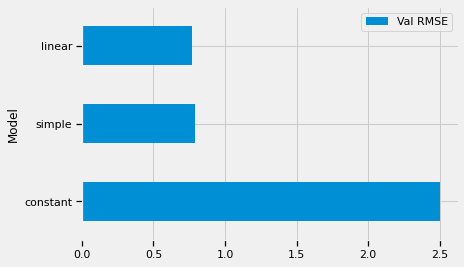

In [443]:
models = ['constant', 'simple', 'linear']
pd.DataFrame.from_dict({
    'Model': models,
    'Val RMSE': [eval(m + '_rmse') for m in models]
}).set_index('Model').plot(kind='barh');

In [450]:
# Write your code here
Y_pred_test = model.predict(create_features(test))
Y_test =  test['Min Delay']
linear_rmse_test = rmse(Y_test - Y_pred_test)

# Print score
print('multiple linear regression model test RMSE: {} minutes'.format(linear_rmse_test))

multiple linear regression model test RMSE: 0.7661145752008984 minutes
